#  Cross Validation with kNN

##Sagar Bhandari
## Sept. 30 , 2025


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dfinit = pd.read_csv('/content/drive/MyDrive/CS167/datasets/Car_Price_Prediction.csv')

In [5]:
dfinit.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.210000
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [6]:
df = dfinit[['Engine Size','Mileage','Year','Price']]
df.head()


,Engine Size,Mileage,Year,Price
0,3.9,74176,2015,30246.210000
1,1.7,94799,2014,22785.747684
2,4.1,98385,2006,25760.290347
3,2.6,88919,2015,25638.003491
4,3.4,138482,2004,21021.386657


In [7]:
df.isna()

,Engine Size,Mileage,Year,Price
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
995,False,False,False,False
996,False,False,False,False
997,False,False,False,False
998,False,False,False,False


In [8]:
df.isna().sum()

,0
Engine Size,0
Mileage,0
Year,0
Price,3




```
It looks like there are only 3 entries missing of price "NaN", out of 1000 entries , i decided to drop those.
```



In [9]:
df = df.dropna() # getting rid of all  NaN values from dataset


In [12]:
df.isna().sum()

,0
Engine Size,0
Mileage,0
Year,0
Price,0




```
Now its cleaned, and looks good to work on.

```





```
Out of the 4 Columns , I will normalize 3:  Engine Size, Mileage and year.
As I am trying to predict price, it will be my target feature.
So i will leave it as it is.
```



In [13]:
#means and std

#engine size
eng_mean = df['Engine Size'].mean()
eng_std = df['Engine Size'].std()

#mileage
mile_mean = df['Mileage'].mean()
mile_std = df['Mileage'].std()

#year
yr_mean = df['Year'].mean()
yr_std = df['Year'].std()

# and a copy of df
normalized_df = df.copy()


# z-score sub. in normalized_df
normalized_df['Engine Size'] = (normalized_df['Engine Size'] - eng_mean)/eng_std
normalized_df['Mileage']     = (normalized_df['Mileage'] - mile_mean)/mile_std
normalized_df['Year']        = (normalized_df['Year'] - yr_mean)/yr_std

In [14]:
# Shuffle the data and seperate 20% for test and 80% for training

shuffled = normalized_df.sample(frac=1, random_state=41)
test_size = int(0.2 * len(shuffled))     #.2 = 20% for test zsize and hence rest 80% for training

test_data = shuffled.iloc[:test_size]
train_data = shuffled.iloc[test_size:]

In [15]:
print("Training  size:", train_data.shape)
print("Test size:", test_data.shape)

Training  size: (798, 4)
Test size: (199, 4)


In [16]:
def kNN_regression(specimen, data, k):
    data = data.copy()
    data['distance_to_new'] = np.sqrt(
        (specimen['Engine Size'] - data['Engine Size'])**2 +
        (specimen['Mileage'] - data['Mileage'])**2 +
        (specimen['Year'] - data['Year'])**2
    )
    sorted_data = data.sort_values('distance_to_new')
    prediction = sorted_data.iloc[0:k]['Price'].mean()
    return prediction


In [17]:
# function to predict all rows in test set


def predict_all_kNN(test_data, train_data, k):
    results = []
    for i in range(len(test_data)):
        specimen = test_data.iloc[i]
        pred = kNN_regression(specimen, train_data, k)
        results.append(pred)
    return pd.Series(results)



```
Among MAE and MSE , i will be using *MAE* here at first

```



In [18]:
def mean_absolute_error(y_true: pd.Series, y_pred: pd.Series) -> float:
    """
    Calculate MAE (Mean Absolute Error) between two pandas Series
    """
    total_error = 0.0
    n = len(y_true)

    for i in range(n):
        total_error += abs(y_true.iloc[i] - y_pred.iloc[i])

    return total_error / n

In [29]:
k_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,25,35,60] # i added more k , to get the best outcome
mae_scores = []

In [ ]:
# Test case. 
#refrence : https://github.com/urness/CS167Fall2025/blob/main/Day09_Metrics_Testing_and_Decision_TreesSolution.ipynb

actual = pd.Series([3, 2, 1, 0])
predicted = pd.Series([1,0,-1,2])
# mean absolute error should be 2
mae = mean_absolute_error(actual, predicted)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 2.0


In [30]:
for k in k_vals:
    predictions = predict_all_kNN(test_data, train_data, k)
    mae = mean_absolute_error(test_data['Price'], predictions)
    mae_scores.append(mae)
    print(f"k={k}, MAE={mae:.2f}") # upto 2 float , same from notebook 2

k=1, MAE=2324.52
k=2, MAE=2120.55
k=3, MAE=1935.90
k=4, MAE=1838.96
k=5, MAE=1815.19
k=6, MAE=1801.58
k=7, MAE=1765.50
k=8, MAE=1799.80
k=9, MAE=1785.10
k=10, MAE=1773.30
k=11, MAE=1761.09
k=12, MAE=1751.06
k=13, MAE=1749.44
k=14, MAE=1755.07
k=15, MAE=1762.75
k=25, MAE=1782.38
k=35, MAE=1844.69
k=60, MAE=1943.77


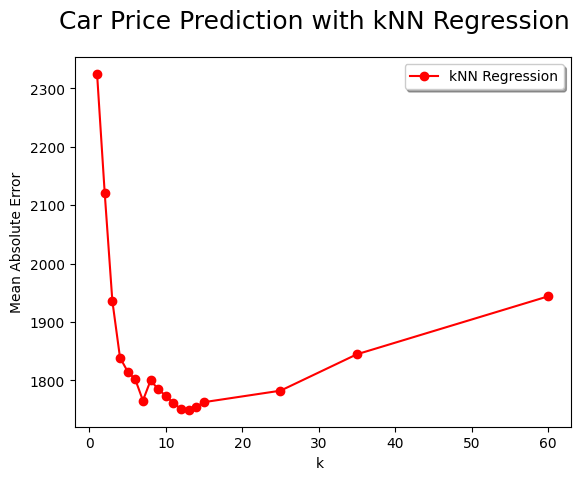

In [31]:
plt.suptitle("Car Price Prediction with kNN Regression", fontsize=18)
plt.xlabel("k ")
plt.ylabel("Mean Absolute Error")
plt.plot(k_vals, mae_scores, 'ro-', label='kNN Regression')
plt.legend(loc='upper right', shadow=True)

plt.show()




```
I am skipping MSE , beacause it will square and hence throwing bad looking numbera and also graph,,
```





```
At starting , when k == 1, the error is very high 2324,
 but it gradulally slopes down with increase of 'K' .
 Around 7 to 15 we get our best result i.e. with less error.

 The lowest is at k=13, MAE=1749.44

 And after k == 15 , the slope of line again steeps up.

 Conclusion: 13 is the best number for k for the k-NN algorithm for this data set
```





```
I am interested in seeing, What is the most expensive and cheapest car
for each of the makers?

I think  this will be  interesting because it will give us a kind of range of
 price for different manufacturers.
```



In [32]:
print(dfinit.columns) # from original dataset ,

Index(['Make', 'Model', 'Year', 'Engine Size', 'Mileage', 'Fuel Type',
       'Transmission', 'Price'],
      dtype='object')




```
1st group them up by make , and get the index of the row for
 min or max of the price value

```



In [39]:
most_expensive = dfinit.loc[dfinit.groupby("Make")["Price"].idxmax()]
print(most_expensive[["Make","Model","Year","Price"]])


       Make    Model  Year         Price
593    Audi  Model C  2019  39167.862820
133     BMW  Model A  2019  41780.504635
295    Ford  Model C  2020  40538.382064
448   Honda  Model E  2019  36842.414493
176  Toyota  Model A  2020  39203.514073


In [ ]:
# for cheapest , same code as for most expensive , but instead of max , it will be min , i.e. idmin()

In [44]:
most_cheapest  = dfinit.loc[dfinit.groupby("Make")["Price"].idxmin()]
print(most_cheapest[["Make","Model","Year","Price"]])


       Make    Model  Year         Price
981    Audi  Model B  2000   6704.953524
569     BMW  Model D  2000  12915.208194
481    Ford  Model C  2001  13870.819778
978   Honda  Model D  2002  12713.018593
746  Toyota  Model E  2005  14004.994362
